In [116]:
### Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
### Step 2: Load Dataset
df = pd.read_csv("/content/water_potability.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [118]:
### Step 5: Logistic Regression
print("\nDataset Description:")
print(df.describe())


Dataset Description:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.

In [119]:
df = df.fillna(df.mean())
print("\nClass Distribution:")
print(df['Potability'].value_counts())


Class Distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [115]:
### Step 4: Visualizations
sns.pairplot(df, hue="Potability")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

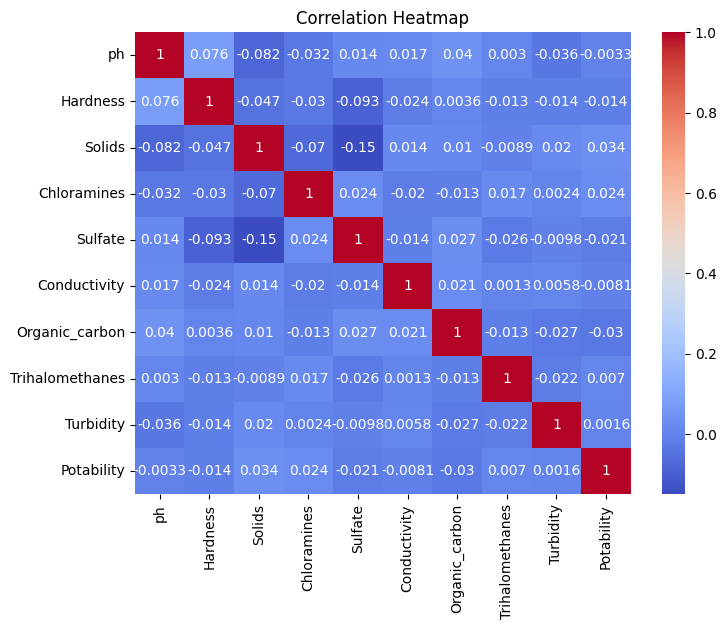

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [128]:
### Step 5: Logistic Regression
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [123]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       400
           1       0.67      0.28      0.39       256

    accuracy                           0.66       656
   macro avg       0.67      0.59      0.58       656
weighted avg       0.67      0.66      0.62       656

Accuracy: 0.6646341463414634


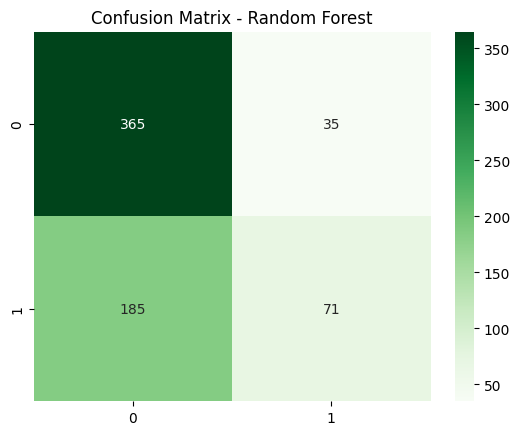

In [131]:
### Step 6: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [127]:

### Step 7: Save Models
import joblib
joblib.dump(model, "logistic_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Models and scaler saved successfully!")

Models and scaler saved successfully!
